# Chapter 3: Linear Regression for a housing dataset

### Setup environment  
그래프 플로팅에 사용할 utils.py 를 다운받고  
turicreate 패키지를 설치합니다.

In [1]:
!git clone https://github.com/luisguiserrano/manning.git
!cp -r /content/manning/Chapter_3_Linear_Regression/. /content/.

Cloning into 'manning'...
remote: Enumerating objects: 1046, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 1046 (delta 12), reused 0 (delta 0), pack-reused 1025
Receiving objects: 100% (1046/1046), 61.50 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (508/508), done.


In [3]:
!pip -q install turicreate

### Importing the necessary packages
사용할 라이브러리 입니다.  
 - plt : 그래프를 그리거나 이미지를 다룰 때 사용합니다. [plt cheatsheet](https://matplotlib.org/cheatsheets/)
 - utils : plt 를 활용해 만든 모듈로, 시각화 함수들이 정의되어 있습니다.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset  
예시로 사용될 임의의 데이터셋을 정의합니다. 예시에서는 방의 개수와 방값이 비례하는 데이터를 생성하였습니다.

In [6]:
# Number of rooms
features = np.array([1,2,3,5,6,7])
# prices
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


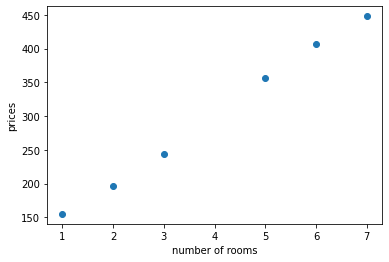

In [7]:
utils.plot_points(features, labels)

### Coding the tricks
여기서 트릭은, 현재 예측과 답을 가지고 가중치를 조정하는 방법을 의미합니다. 


```py
# 입력
num_rooms
# 가중치(weights)
base_price    
price_per_room 
# 예측
predicted_price = base_price + price_per_room*num_rooms
# 답 
price
```


- Simple trick  
  예측한 방값, 실제 가격, 방의 개수를 비교해 임의의 값 만큼 가중치를 조정합니다. 임의의 값은 [0, 0.1) 의 범위를 갖습니다.
- Absolute trick  
  loss 를 활용합니다. 이때 loss = | 예측 - 답 | 이고 loss를 줄이는 방향으로 가중치를 조정합니다. 조정 값은 아래와 같습니다. $$ -{∂loss \over \partial weight} (learning\_rate) $$
- Square trick  
loss 를 활용합니다. 이때 loss = ( 예측 - 답 )^2 이고 loss를 줄이는 방향으로 가중치를 조정합니다. 조정 값은 아래와 같습니다. $$ -{∂loss \over \partial weight} (learning\_rate) $$

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [8]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.
- 예시에서는 square trick 을 사용하여 1000 번 반복합니다.

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

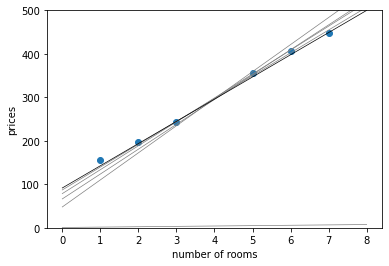

In [17]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        # if True:
        if epoch%(epochs//5)==0:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

### Root mean squared error function  
RMSE 함수를 정의합니다. 식은 다음과 같습니다.
$$ RMSE = \sqrt{mean((predictions - labels)^2}) $$

In [18]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

In [19]:
pred = np.array([150,200,250,350,400,450])
label = np.array([155, 197, 244, 356,407,448])

print(rmse(label, pred))

5.1478150704935


### Plotting the error function  
위 linear_regression 함수가 회귀하는 과정에서 error 를 시각화하였습니다.
```
predictions = features*price_per_room+base_price
errors.append(rmse(labels, predictions))
...
plt.scatter(range(len(errors)), errors)
plt.show()
```
* 아래와 같은 다차원 배열을 계산할 땐 차원에 주의해야 합니다.  
[Numpy broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
```
predictions = features*price_per_room+base_price
shape: (6,) = (6,)    *(scalar)      +(scalar)
```
* 한번의 학습에 features 중 하나만 사용하는 Stochastic 방법을 볼 수 있습니다.
```
i = random.randint(0, len(features)-1)
num_rooms = features[i]
price = labels[i]
```
* plt의 여러 함수로 그래프에 여러가지를 추가할 수 있습니다.
```
plt.title('Root mean squared error')
plt.xlabel('iteration')
plt.ylabel('error')
```

Price per room: 50.207470222215356
Base price: 99.04749771048769


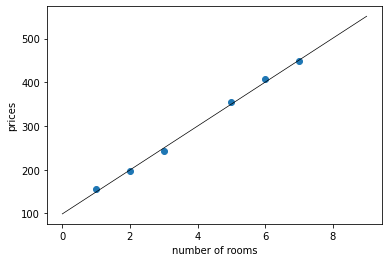

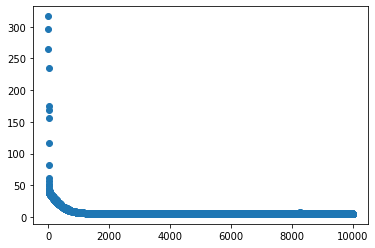

(50.207470222215356, 99.04749771048769)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for _ in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)


### Linear regression in Turi Create
Turicreate 에 정의된 linear_regression을 사용합니다. 이를 사용하기 위해 위에서 numpy.ndarray 로 정의한 데이터셋을 tc.Sframe 형태로 바꿔줍니다.  
  
Turicreate linear_regression 에 대한 상세한 설명은 아래 링크를 읽어보시기 바랍니다.  
[tc.linear_regression.create() Docs](https://apple.github.io/turicreate/docs/api/generated/turicreate.linear_regression.create.html#turicreate.linear_regression.create)

In [ ]:
import turicreate as tc

datadict = {
    'features': features,
    'labels'  : labels,
}

data = tc.SFrame(datadict)

data

features,labels
1,155
2,197
3,244
5,356
6,407
7,448


In [ ]:

model = tc.linear_regression.create(data, target='labels')
model2 = tc.linear_regression.create(
    data, 
    target='labels', 
    features=None, 
    l2_penalty=0.01, 
    l1_penalty=0, 
    solver="auto", 
    feature_rescaling=True, 
    validation_set="auto", 
    verbose=True
)

Linear regression:

--------------------------------------------------------

Number of examples          : 6

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.000998     | 7.159578           | 5.011301                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model.coefficients

Linear regression:

--------------------------------------------------------

Number of examples          : 6

Number of features          : 1

Number of unpacked features : 1

name,index,value,stderr
(intercept),None,101.13831392475663,5.2729333579825095
features,None,50.007088185477514,1.1598906969719875


Number of coefficients    : 2

Starting Newton Method

In [ ]:
new_point = tc.SFrame({'features': [4]})

model.predict(new_point)

dtype: float
Rows: 1
[301.1666666666667]